In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('instagram.csv')

In [3]:
data.head(10)

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04
5,The app has been glitching alot. Videos will n...,1,2023-07-11 05:04:31
6,"I like this app a lot, but the messaging part ...",3,2023-07-18 12:48:16
7,"Eventhough sometimes it works, most of the tim...",2,2023-07-13 14:01:32
8,I'm not sure what the point of leaving a revie...,1,2023-07-14 02:26:22
9,This app has so many frustrating aspects. The ...,2,2023-07-13 07:46:30


In [7]:
data.isnull().sum()

review_description    0
rating                0
review_date           0
dtype: int64

In [10]:
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stemmer=nltk.SnowballStemmer("english")
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|WWW\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('\n','',text)
    text=re.sub('\W*\d\W*','',text)
    text=[word for word in text.split(' ')]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review_description"]=data["review_description"].apply(clean)

In [13]:
data.drop("rating",axis=1,inplace=True)

In [14]:
data.drop("review_date",axis=1,inplace=True)

In [15]:
data.head(10)

,review_description
0,"the app is good for connect with friends, fami..."
1,"use to be my favorit social media app, but ""im..."
2,instagram is the best of all the social media....
3,"i love this app.. but as of late, i have been ..."
4,use to be a great app but there are so mani mo...
5,the app has been glitch alot. video will not p...
6,"i like this app a lot, but the messag part of ..."
7,"eventhough sometim it works, most of the time ..."
8,i'm not sure what the point of leav a review w...
9,this app has so mani frustrat aspects. the the...


In [16]:
sia=SentimentIntensityAnalyzer()
def label_sentiment(x:float):
    if x < -0.05 : return 'Negative'
    if x > 0.35 : return 'Positive'
    return 'Neutral'




In [20]:
data['Positive']=[sia.polarity_scores(i)["pos"] for i in data["review_description"]]
data['Negative']=[sia.polarity_scores(i)["neg"] for i in data["review_description"]]
data['Neutral']=[sia.polarity_scores(i)["neu"] for i in data["review_description"]]
data=data[["review_description","Positive","Negative","Neutral"]]

In [21]:
data.head(10)

,review_description,Positive,Negative,Neutral
0,"the app is good for connect with friends, fami...",0.044,0.038,0.918
1,"use to be my favorit social media app, but ""im...",0.025,0.064,0.911
2,instagram is the best of all the social media....,0.126,0.024,0.850
3,"i love this app.. but as of late, i have been ...",0.095,0.051,0.853
4,use to be a great app but there are so mani mo...,0.104,0.131,0.765
5,the app has been glitch alot. video will not p...,0.029,0.056,0.914
6,"i like this app a lot, but the messag part of ...",0.138,0.038,0.824
7,"eventhough sometim it works, most of the time ...",0.139,0.074,0.786
8,i'm not sure what the point of leav a review w...,0.043,0.061,0.896
9,this app has so mani frustrat aspects. the the...,0.019,0.092,0.889


In [22]:
x=sum(data['Positive'])
y=sum(data['Negative'])
z=sum(data['Neutral'])
print("Positive : ",x)
print("Negative :",y)
print("Neutral :",z)

Positive :  23017.44699999932
Negative : 16571.472999999933
Neutral : 170952.75499999814


In [23]:
data["sentiment"]=[sia.polarity_scores(x)['compound'] for x in data['review_description']]
data['Overall_Sentiment']=data['sentiment'].apply(label_sentiment)

In [26]:
data.head(10)

,review_description,Positive,Negative,Neutral,sentiment,Overall_Sentiment
0,"the app is good for connect with friends, fami...",0.044,0.038,0.918,0.1406,Neutral
1,"use to be my favorit social media app, but ""im...",0.025,0.064,0.911,-0.5526,Negative
2,instagram is the best of all the social media....,0.126,0.024,0.850,0.8860,Positive
3,"i love this app.. but as of late, i have been ...",0.095,0.051,0.853,0.4650,Positive
4,use to be a great app but there are so mani mo...,0.104,0.131,0.765,-0.6908,Negative
5,the app has been glitch alot. video will not p...,0.029,0.056,0.914,-0.2434,Negative
6,"i like this app a lot, but the messag part of ...",0.138,0.038,0.824,0.8765,Positive
7,"eventhough sometim it works, most of the time ...",0.139,0.074,0.786,0.6369,Positive
8,i'm not sure what the point of leav a review w...,0.043,0.061,0.896,-0.1759,Negative
9,this app has so mani frustrat aspects. the the...,0.019,0.092,0.889,-0.6952,Negative


In [31]:
data['Overall_Sentiment'].value_counts()

Overall_Sentiment
Negative    85534
Positive    74212
Neutral     50796
Name: count, dtype: int64

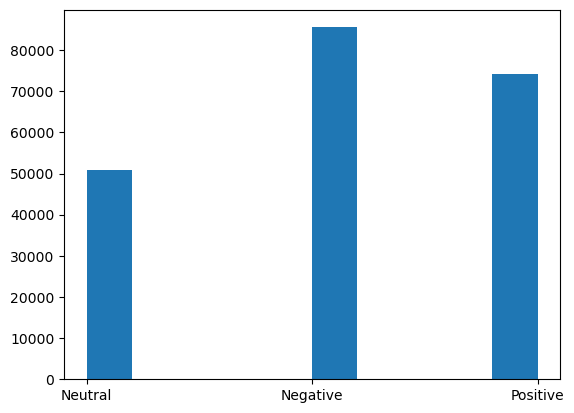

In [32]:
import matplotlib.pyplot as plt
plt.hist(data['Overall_Sentiment'])
plt.show()

Overall Negative Reviews For Instagram